Question---------Implement a KNN model to classify the animals in to categories

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
df=pd.read_csv("D:/Zoo.csv")

In [97]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Exploratory Data analysis..................................................

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [99]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [100]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [101]:
#check if there are duplicates in animal_name
dublicates=df["animal name"].value_counts()
dublicates[dublicates>1]

frog    2
Name: animal name, dtype: int64

In [102]:
frog = df[df['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [103]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
df['animal name'][(df['venomous'] == 1 )& (df['animal name'] == 'frog')] = "frog2"

In [104]:
frog = df[df['animal name'] == 'frog2']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog2,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [105]:
df['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [106]:
df.head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [107]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [108]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in df.hair]### we will Use Here List Comprehension.
unique_color = list(set(color_list))
unique_color

['red', 'blue']

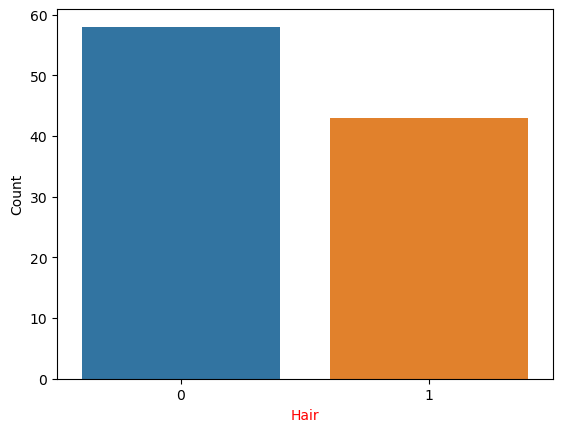

0    58
1    43
Name: hair, dtype: int64

In [109]:
sns.countplot(x="hair", data=df,)
plt.xlabel("Hair",color="red")
plt.ylabel("Count")
plt.show()
df.loc[:,'hair'].value_counts()

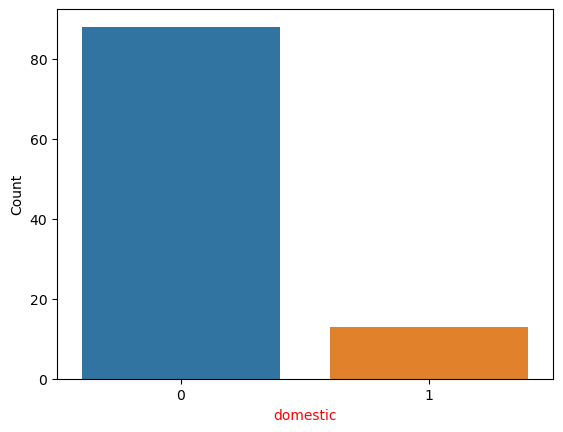

0    88
1    13
Name: domestic, dtype: int64

In [110]:
sns.countplot(x="domestic", data=df)
plt.xlabel("domestic",color="red")
plt.ylabel("Count")
plt.show()
df.loc[:,'domestic'].value_counts()

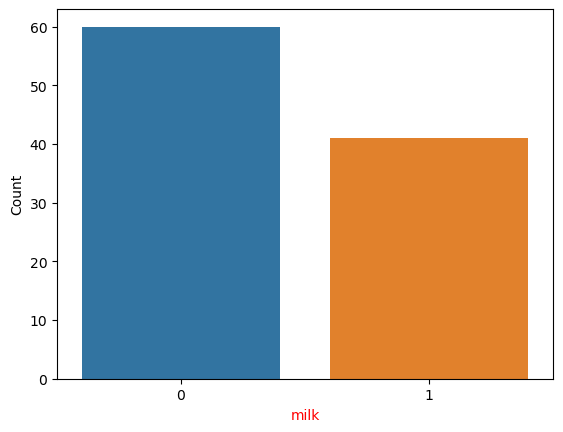

0    60
1    41
Name: milk, dtype: int64

In [111]:
sns.countplot(x="milk", data=df)
plt.xlabel("milk",color="red")
plt.ylabel("Count")
plt.show()
df.loc[:,'milk'].value_counts()

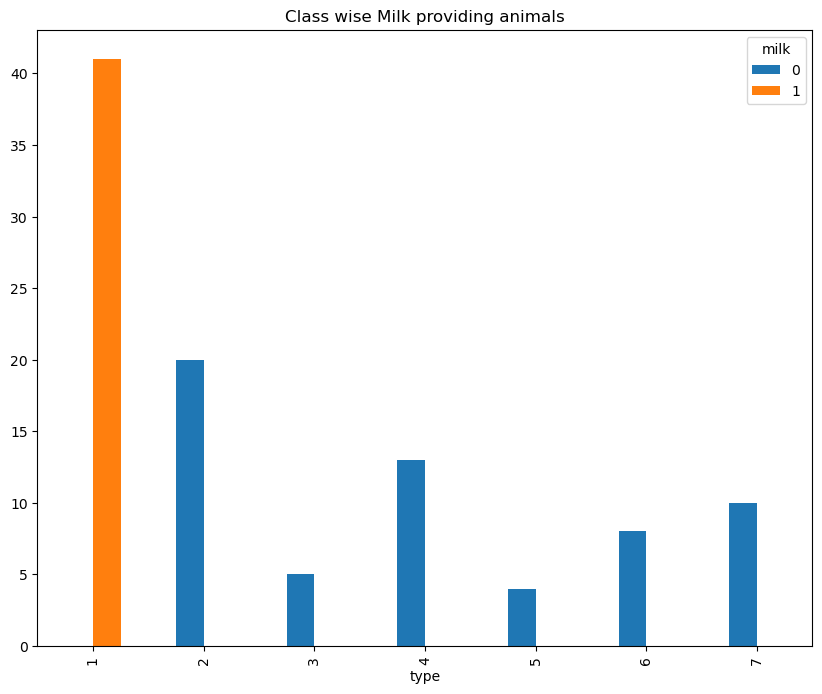

In [112]:
# So there are 41 animals in the list which provides us milk. Lets see to which category they belongs
pd.crosstab(df['type'], df['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [113]:
pd.crosstab(df['type'], df['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


In [114]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
df["aquatic"].value_counts() # only 36 aquatic animals are there.
# lets see there class

0    65
1    36
Name: aquatic, dtype: int64

In [115]:
pd.crosstab(df['type'], df['aquatic'])

aquatic,0,1
type,,
1,35,6
2,14,6
3,4,1
4,0,13
5,0,4
6,8,0
7,4,6


In [116]:
df[df['aquatic']==1].type.value_counts()### Here We Will See How many Animals Are Aquatic Here ....

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

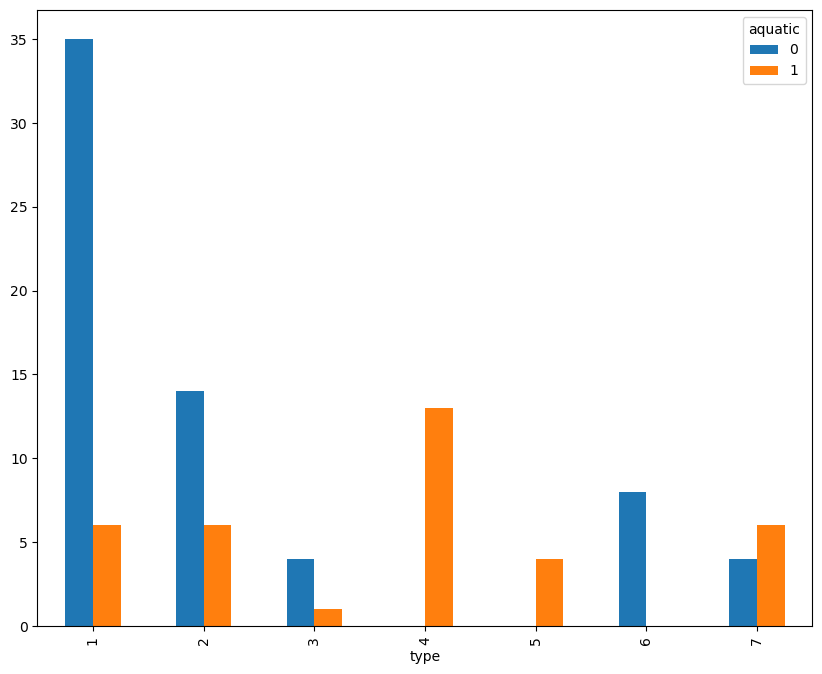

In [117]:
pd.crosstab(df['type'], df['aquatic']).plot(kind="bar", figsize=(10, 8));

In [118]:
# finding Unique value of class_type
type_list = [i for i in df.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [119]:
df["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [120]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [121]:
# split train test data into 70/30.
Y=df["type"]
df1 = df.iloc[:, 1:17]

In [122]:
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


# Transformation Of a continuous Variable with Z-Value this is -3 to +3

In [123]:
from sklearn.preprocessing import  StandardScaler
ss= StandardScaler()
X=ss.fit_transform(df1)

In [124]:
X

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [125]:
X=pd.DataFrame(X)

In [126]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [127]:
X.columns=["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize"]

In [128]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


# When n_neighbors is Equl To 9

In [129]:
train_Accuracy=[]
test_Accuracy=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ac
from scipy import stats


In [130]:
from sklearn.model_selection import train_test_split
for i in range(1,101):#### For The Accuracy Cosistency We Will Provide A For Loop.........
    knn = KNeighborsClassifier(n_neighbors=9,p=2) # p=2 --> Eucledian
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=(i))
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_Accuracy.append(ac(Y_train,Y_pred_train))
    test_Accuracy.append(ac(Y_test,Y_pred_test))

In [131]:
print(train_Accuracy)

[0.9, 0.8285714285714286, 0.9285714285714286, 0.9, 0.9, 0.9142857142857143, 0.8571428571428571, 0.8857142857142857, 0.8428571428571429, 0.9285714285714286, 0.8714285714285714, 0.9, 0.9285714285714286, 0.8857142857142857, 0.8428571428571429, 0.8714285714285714, 0.8714285714285714, 0.8571428571428571, 0.9142857142857143, 0.8857142857142857, 0.8714285714285714, 0.8857142857142857, 0.9571428571428572, 0.8714285714285714, 0.9, 0.9142857142857143, 0.9285714285714286, 0.9, 0.9428571428571428, 0.8714285714285714, 0.8714285714285714, 0.8857142857142857, 0.8857142857142857, 0.8571428571428571, 0.8571428571428571, 0.9142857142857143, 0.8285714285714286, 0.9285714285714286, 0.9, 0.9428571428571428, 0.8571428571428571, 0.9, 0.9, 0.8714285714285714, 0.8285714285714286, 0.8857142857142857, 0.9428571428571428, 0.8571428571428571, 0.9, 0.8857142857142857, 0.9285714285714286, 0.9142857142857143, 0.9, 0.8571428571428571, 0.9, 0.8571428571428571, 0.8857142857142857, 0.9, 0.8857142857142857, 0.871428571428

In [132]:
print(test_Accuracy)

[0.8387096774193549, 0.8387096774193549, 0.8709677419354839, 0.8709677419354839, 0.8387096774193549, 0.967741935483871, 0.7419354838709677, 0.7419354838709677, 0.9032258064516129, 0.7741935483870968, 0.9032258064516129, 0.9354838709677419, 0.9032258064516129, 0.8064516129032258, 0.9354838709677419, 0.8064516129032258, 0.8387096774193549, 0.967741935483871, 0.7096774193548387, 0.9354838709677419, 0.9354838709677419, 0.8387096774193549, 0.8387096774193549, 0.7096774193548387, 0.8387096774193549, 0.8709677419354839, 0.9032258064516129, 0.7419354838709677, 0.7741935483870968, 0.8387096774193549, 0.9032258064516129, 0.8387096774193549, 0.9354838709677419, 0.967741935483871, 0.9354838709677419, 0.9032258064516129, 0.9032258064516129, 0.8064516129032258, 0.8387096774193549, 0.8064516129032258, 0.8387096774193549, 0.7096774193548387, 0.8709677419354839, 0.7096774193548387, 0.8709677419354839, 0.7419354838709677, 0.7096774193548387, 0.7419354838709677, 0.8387096774193549, 0.8387096774193549, 0.

In [133]:
import numpy as np
print("Trainning Accuracy Will Be:.........",np.mean(train_Accuracy).round(2))
import numpy as np
print("Test Accuracy Accuracy Will Be:.........",np.mean(test_Accuracy).round(2))

Trainning Accuracy Will Be:......... 0.89
Test Accuracy Accuracy Will Be:......... 0.83


# When n_neighbors is Equl To 7

In [134]:
train_Accuracy1=[]
test_Accuracy1=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ac

In [135]:
from sklearn.model_selection import train_test_split
for i in range(1,101):#### For The Accuracy Cosistency We Will Provide A For Loop.........
    knn = KNeighborsClassifier(n_neighbors=7,p=2) # p=2 --> Eucledian
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=(i))
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_Accuracy1.append(ac(Y_train,Y_pred_train))
    test_Accuracy1.append(ac(Y_test,Y_pred_test))

In [136]:
print(train_Accuracy1)

[0.9142857142857143, 0.8857142857142857, 0.9285714285714286, 0.9285714285714286, 0.9428571428571428, 0.9, 0.9, 0.9, 0.8714285714285714, 0.9142857142857143, 0.9428571428571428, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.8714285714285714, 0.9, 0.8857142857142857, 0.9285714285714286, 0.9285714285714286, 0.9142857142857143, 0.8571428571428571, 0.9714285714285714, 0.9428571428571428, 0.9142857142857143, 0.9142857142857143, 0.9428571428571428, 0.9285714285714286, 0.8714285714285714, 0.9428571428571428, 0.9, 0.8714285714285714, 0.8714285714285714, 0.9285714285714286, 0.8857142857142857, 0.8714285714285714, 0.9285714285714286, 0.9428571428571428, 0.9428571428571428, 0.9, 0.9428571428571428, 0.8857142857142857, 0.9142857142857143, 0.8857142857142857, 0.9428571428571428, 0.9142857142857143, 0.9285714285714286, 0.9428571428571428, 0.9428571428571428, 0.8857142857142857, 0.9428571428571428, 0.9428571428571428, 0.9142857142857143, 0.9142857142857143, 0.9, 0.9428571428571428, 0.94

In [137]:
print(test_Accuracy1)

[0.9354838709677419, 0.9032258064516129, 0.9354838709677419, 0.9354838709677419, 0.8387096774193549, 0.9032258064516129, 0.7419354838709677, 0.7741935483870968, 0.9354838709677419, 0.8064516129032258, 0.9354838709677419, 0.8709677419354839, 0.9032258064516129, 0.8387096774193549, 0.9032258064516129, 0.8064516129032258, 0.8387096774193549, 0.967741935483871, 0.7096774193548387, 0.8709677419354839, 0.8709677419354839, 0.9032258064516129, 0.8064516129032258, 0.7096774193548387, 0.8709677419354839, 0.8709677419354839, 0.9354838709677419, 0.7741935483870968, 0.7741935483870968, 0.8064516129032258, 0.9032258064516129, 0.8064516129032258, 0.967741935483871, 0.9354838709677419, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.7741935483870968, 0.8709677419354839, 0.8064516129032258, 0.9032258064516129, 0.7419354838709677, 0.9032258064516129, 0.7741935483870968, 0.8709677419354839, 0.7419354838709677, 0.7419354838709677, 0.8387096774193549, 0.8387096774193549, 0.9032258064516129, 0

In [138]:
import numpy as np
print("Trainning Accuracy Will Be:.........",np.mean(train_Accuracy1).round(2))
import numpy as np
print("Test Accuracy Accuracy Will Be:.........",np.mean(test_Accuracy1).round(2))

Trainning Accuracy Will Be:......... 0.92
Test Accuracy Accuracy Will Be:......... 0.85


# When n_neighbors is Equl To 5

In [139]:
train_Accuracy2=[]
test_Accuracy2=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ac

In [140]:
from sklearn.model_selection import train_test_split
for i in range(1,101):#### For The Accuracy Cosistency We Will Provide A For Loop.........
    knn = KNeighborsClassifier(n_neighbors=5,p=2) # p=2 --> Eucledian
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=(i))
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_Accuracy2.append(ac(Y_train,Y_pred_train))
    test_Accuracy2.append(ac(Y_test,Y_pred_test))

In [141]:
import numpy as np
print("Trainning Accuracy Will Be:.........",np.mean(train_Accuracy2).round(2))
import numpy as np
print("Test Accuracy Accuracy Will Be:.........",np.mean(test_Accuracy2).round(2))

Trainning Accuracy Will Be:......... 0.95
Test Accuracy Accuracy Will Be:......... 0.89
